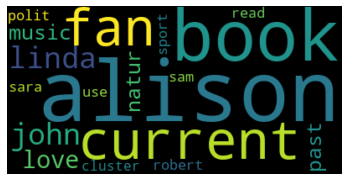

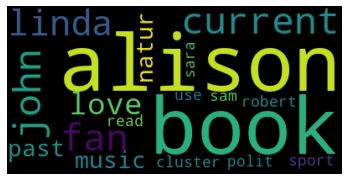

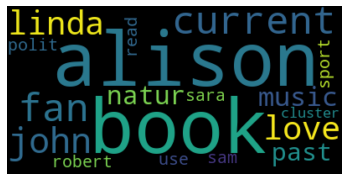

In [2]:
import nltk
from nltk.stem import *
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk import word_tokenize

s1 = 'In the past John liked only sport but now he likes sport and politics'
s2 = 'Sam only liked politics but now he is fan of both music and politics'
s3 = 'Sara likes both books and politics but in the past she only read books'
s4 = 'Robert loved both books and nature but now he only reads books'
s5 = 'Linda liked books and sport but she only likes sport now'
s6 = 'Alison used to loved nature but currently she likes both nature and sport'

t1 = nltk.word_tokenize(s1.lower())
t2 = nltk.word_tokenize(s2.lower())
t3 = nltk.word_tokenize(s3.lower())
t4 = nltk.word_tokenize(s4.lower())
t5 = nltk.word_tokenize(s5.lower())
t6 = nltk.word_tokenize(s6.lower())

stemmer = PorterStemmer()
st1 = [stemmer.stem(word) for word in t1 if word not in set(stopwords.words('english'))]
st2 = [stemmer.stem(word) for word in t2 if word not in set(stopwords.words('english'))]
st3 = [stemmer.stem(word) for word in t3 if word not in set(stopwords.words('english'))]
st4 = [stemmer.stem(word) for word in t4 if word not in set(stopwords.words('english'))]
st5 = [stemmer.stem(word) for word in t5 if word not in set(stopwords.words('english'))]
st6 = [stemmer.stem(word) for word in t6 if word not in set(stopwords.words('english'))]

lemmatizer = WordNetLemmatizer()

lemmatized_output1 = ' '.join([lemmatizer.lemmatize(w.lower()) for w in st1])
lemmatized_output2 = ' '.join([lemmatizer.lemmatize(w.lower()) for w in st2])
lemmatized_output3 = ' '.join([lemmatizer.lemmatize(w.lower()) for w in st3])
lemmatized_output4 = ' '.join([lemmatizer.lemmatize(w.lower()) for w in st4])
lemmatized_output5 = ' '.join([lemmatizer.lemmatize(w.lower()) for w in st5])
lemmatized_output6 = ' '.join([lemmatizer.lemmatize(w.lower()) for w in st6])

finalS1 = ''.join(lemmatized_output1)
finalS2 = ''.join(lemmatized_output2)
finalS3 = ''.join(lemmatized_output3)
finalS4 = ''.join(lemmatized_output4)
finalS5 = ''.join(lemmatized_output5)
finalS6 = ''.join(lemmatized_output6)

corpus = []
corpus.append(finalS1)
corpus.append(finalS2)
corpus.append(finalS3)
corpus.append(finalS4)
corpus.append(finalS5)
corpus.append(finalS6)

from sklearn.feature_extraction.text import TfidfVectorizer

v = TfidfVectorizer(use_idf=False, norm='l1')
tf = v.fit_transform(corpus)
df = pd.DataFrame(tf.toarray(), columns=v.get_feature_names())

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from kneed import KneeLocator

X=df.iloc[:,[1, 5]].values
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
df['cluster']=y_kmeans


text = " ".join(word for word in df)
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

v = TfidfVectorizer(norm='l2')
tfidf = v.fit_transform(corpus)
df = pd.DataFrame(tfidf.toarray(), columns=v.get_feature_names())

X=df.iloc[:,[1, 5]].values
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
df['cluster']=y_kmeans

text = " ".join(word for word in df)
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
CountVec = CountVectorizer(ngram_range=(1,1), stop_words='english')
Count_data = CountVec.fit_transform(corpus)
df =pd.DataFrame(Count_data.toarray(),columns=CountVec.get_feature_names())

X=df.iloc[:,[1, 5]].values
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
df['cluster']=y_kmeans

text = " ".join(word for word in df)
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


